# Import the data

In [86]:
import pandas as pd
import numpy as np
# not skipping empty values, to demonstrate data preprocessing steps later
df = pd.read_csv("kick.csv", na_filter=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41409 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   VehOdo                             41409 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice  41409 non-null  int64 
 2   Make                               41409 non-null  object
 3   WarrantyCost                       41409 non-null  int64 
 4   IsBadBuy                           41409 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


# Data preprocessing

### Get more information from each attributes


In [87]:
# get more information from each column
for col in df:
    print(f"Col: {col}")
    print(f"describe: {df[col].describe()}")
    print(f"value counts: {df[col].value_counts()}\n")

Col: VehOdo
describe: count     41409.000000
mean      71299.961868
std       14723.019112
min         577.000000
25%       61586.000000
50%       73128.000000
75%       82256.000000
max      480444.000000
Name: VehOdo, dtype: float64
value counts: VehOdo
83962    6
67464    6
79600    6
76867    6
80612    6
        ..
78038    1
70239    1
76468    1
89897    1
66855    1
Name: count, Length: 28599, dtype: int64

Col: MMRAcquisitionAuctionAveragePrice
describe: count    41409.000000
mean      6135.010433
std       2481.223003
min          0.000000
25%       4273.000000
50%       6105.000000
75%       7783.000000
max      33543.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64
value counts: MMRAcquisitionAuctionAveragePrice
0        502
5480     205
6311      96
7811      79
7644      74
        ... 
10099      1
9971       1
9761       1
10363      1
7535       1
Name: count, Length: 9270, dtype: int64

Col: Make
describe: count         41409
unique           30
top     

### unique number for each column

In [88]:
for col in df:
    print(f"Col: {col}")
    print(f"Unique: {df[col].unique()}")


Col: VehOdo
Unique: [51099 48542 46318 ... 65399 45234 66855]
Col: MMRAcquisitionAuctionAveragePrice
Unique: [8566 8835 7165 ... 9842 1996 7535]
Col: Make
Unique: ['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']
Col: WarrantyCost
Unique: [ 920  834  671 1500  505 1703  837 1003  762  975 1328  482 1181 1155
  533  905 1215  623 1086  754  728 1020  693 2282  825 3667 1740  882
 1623 1763  462 1118 1485 1220  983  569  853 1272  764 1506 1806 1113
 1373 2152  582 1503  923  686  594 1053  803 1413 1243 1918 2712  588
  723 2274  833 1389  630 1633  894 1613 2351 1251 1974 1923 1630  810
 1450 1341 1205 1543 1933 1169 1411 1125 4032 2022 2003  930 1551 1785
 1606 1497 2091 4210 2452 1666 1103  765  986 3415 1153 1134 1283 2412
 2506 1455 2063  620 2322  869 4922

### Visualization data

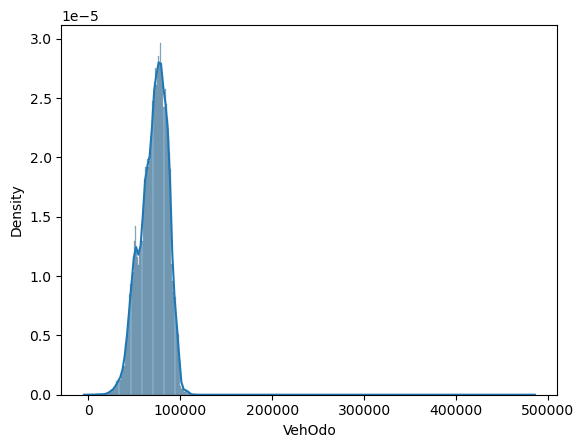

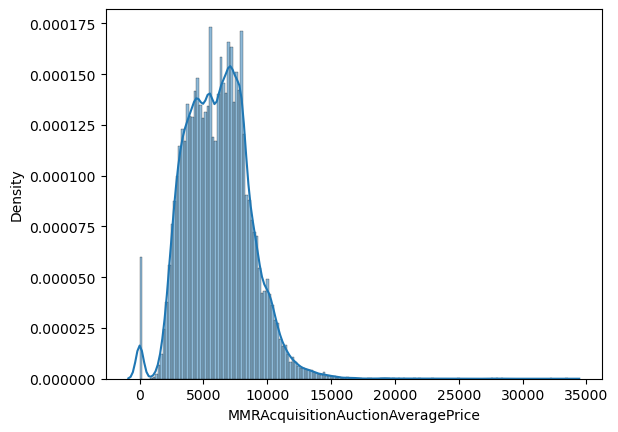

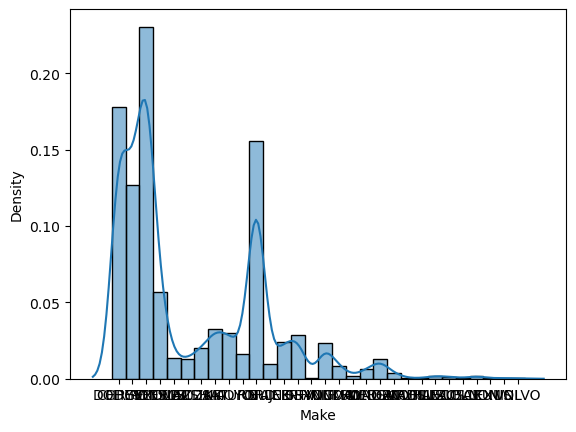

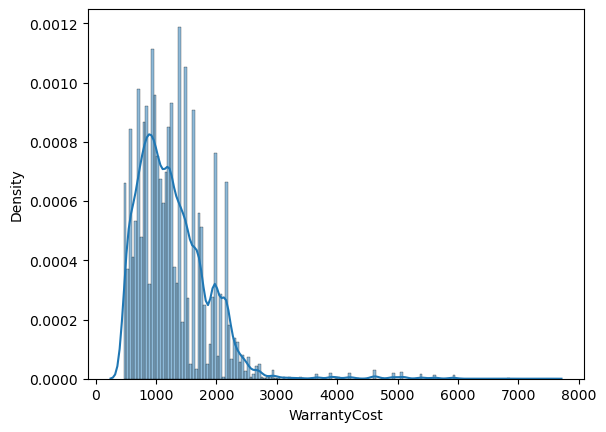

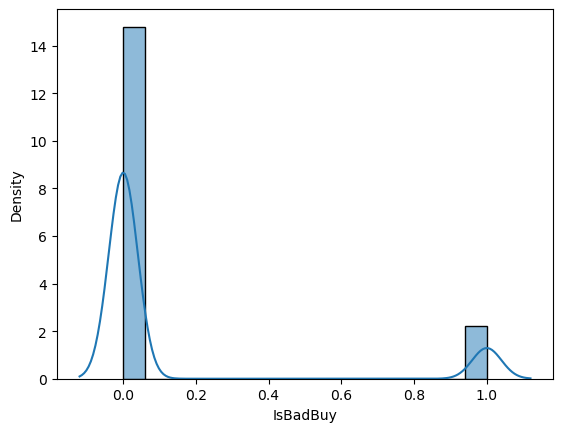

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of each column
for col in df:
    regdens_dist = sns.histplot(df[col].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
    plt.show()

### Check errorneous value for MMRAcquisitionAuctionAveragePrice

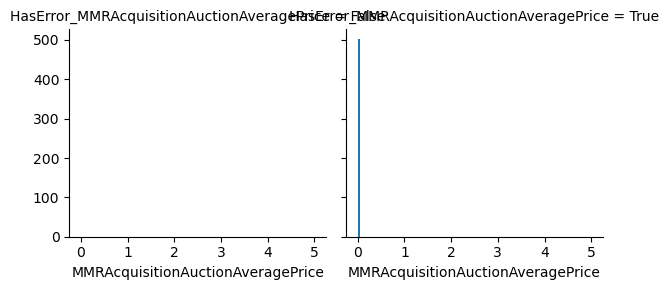

In [90]:
# create a mask of errorneous MeanHHSz values
df['HasError_MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'] < 1
# use FaceTGrid to plot the distribution of MedHHInc when MeanHHSZ is errorneous
g = sns.FacetGrid(df, col='HasError_MMRAcquisitionAuctionAveragePrice')
g = g.map(plt.hist, 'MMRAcquisitionAuctionAveragePrice', bins=100, range=(0, 5))
plt.show()

### Drop the errorneous value and drop IsBadBuy

VehOdo 41409
Row # after dropping errorneous rows 40906


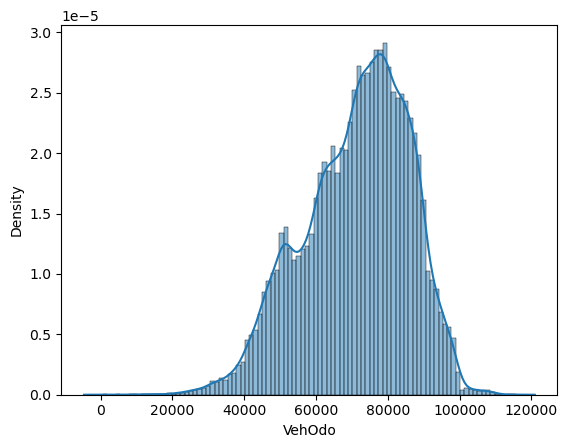

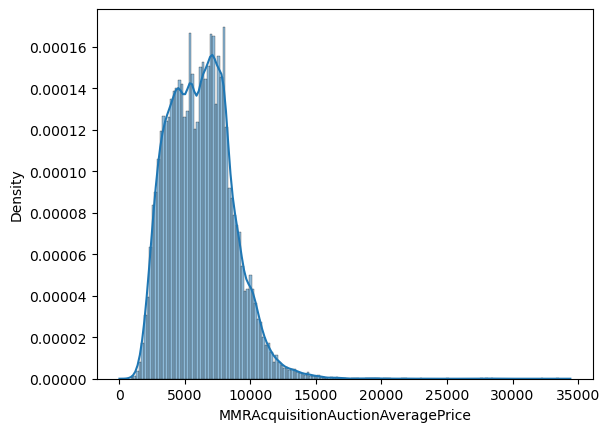

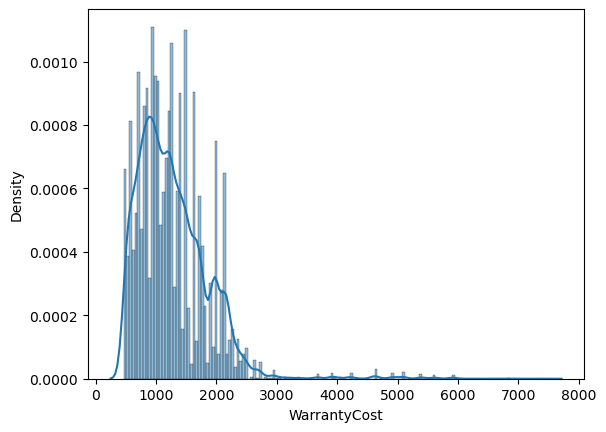

<class 'pandas.core.frame.DataFrame'>
Index: 40906 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   VehOdo                                      40906 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice           40906 non-null  int64 
 2   Make                                        40906 non-null  object
 3   WarrantyCost                                40906 non-null  int64 
 4   HasError_MMRAcquisitionAuctionAveragePrice  40906 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 1.6+ MB


In [91]:
# before
print("VehOdo", len(df))
# a very easy way to drop rows with MMRAcquisitionAuctionAveragePrice values below 1
df = df[df['MMRAcquisitionAuctionAveragePrice'] >= 1]

#drop the too large value over ,480000
df = df[df['VehOdo'] < 480000]
# after
print("Row # after dropping errorneous rows", len(df))

# drop isbadbuy
df = df.drop(['IsBadBuy'], axis=1)

#after dropping
# Distribution of VehOdo
regdens_dist = sns.histplot(df['VehOdo'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()
# Distribution of MMRAcquisitionAuctionAveragePrice
medhhinc_dist = sns.histplot(df['MMRAcquisitionAuctionAveragePrice'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()
# Distribution of WarrantyCost
meanhhsz_dist = sns.histplot(df['WarrantyCost'].dropna(), kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

#check if isbadbuy removed
df.info()


### Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

df2 = df[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'WarrantyCost']].copy()
# convert df2 to matrix
X = df2.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means Clustering

In [93]:
from sklearn.cluster import KMeans
# random state, we will use 42 instead of 10 for a change
random_state = 42
# set the random state. different random state seeds might
# result in different centroids locations
model = KMeans(n_clusters=3, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 65917.41286828429
Centroid locations:
[ 0.68358495 -0.8064257   0.52318269]
[-0.99636956 -0.12290295 -0.66959661]
[0.46429421 1.01454329 0.2434698 ]


### set a different n_clusters

In [94]:
model = KMeans(n_clusters=8, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance as n_cluster=8:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance as n_cluster=8: 32982.528495140024
Centroid locations:
[0.76728794 0.58585773 1.03016803]
[-1.54167575  0.53826054 -0.76525556]
[ 0.77406077 -0.78670888 -0.3793936 ]
[ 0.45449064  1.79953021 -0.1336805 ]
[-0.07631042  0.32802189 -0.20644997]
[ 0.70380132 -1.0396971   1.17415379]
[ 0.39990217 -0.91202618  5.70443139]
[-0.93075396 -0.8332585  -0.60579222]


# Visual a Clustering Model

Cluster membership
Cluster_ID
1    15015
0    13406
2    12485
Name: count, dtype: int64


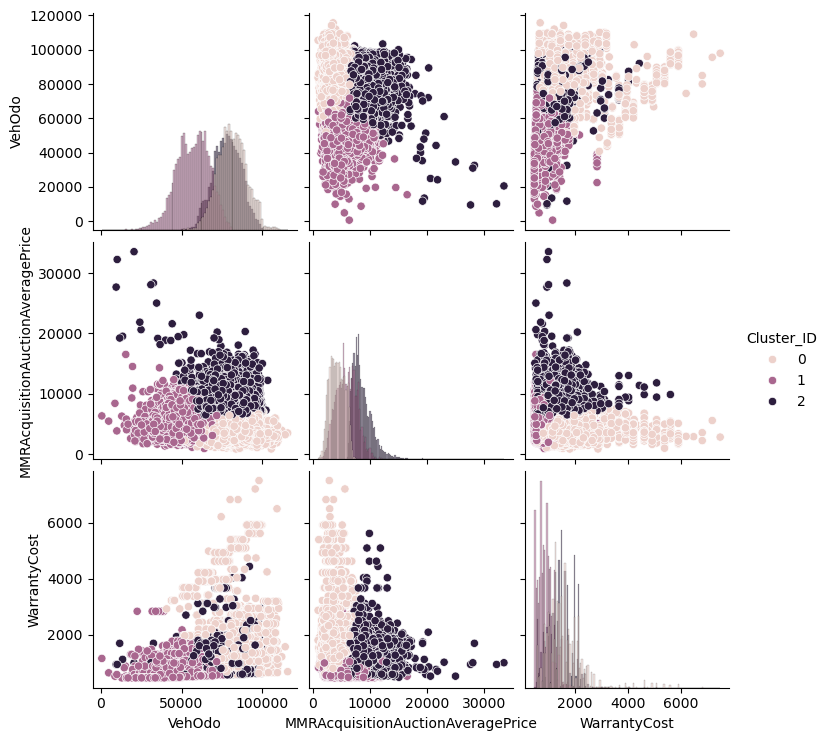

In [95]:
model = KMeans(n_clusters=3, random_state=random_state).fit(X)
# assign cluster ID to each record in X
y = model.predict(X)
df2['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

Sum of intra-cluster distance: 32982.528495140024
Centroid locations:
[0.76728794 0.58585773 1.03016803]
[-1.54167575  0.53826054 -0.76525556]
[ 0.77406077 -0.78670888 -0.3793936 ]
[ 0.45449064  1.79953021 -0.1336805 ]
[-0.07631042  0.32802189 -0.20644997]
[ 0.70380132 -1.0396971   1.17415379]
[ 0.39990217 -0.91202618  5.70443139]
[-0.93075396 -0.8332585  -0.60579222]
Cluster membership
Cluster_ID
4    7805
2    7147
7    6406
0    5595
1    5353
5    4334
3    3923
6     343
Name: count, dtype: int64


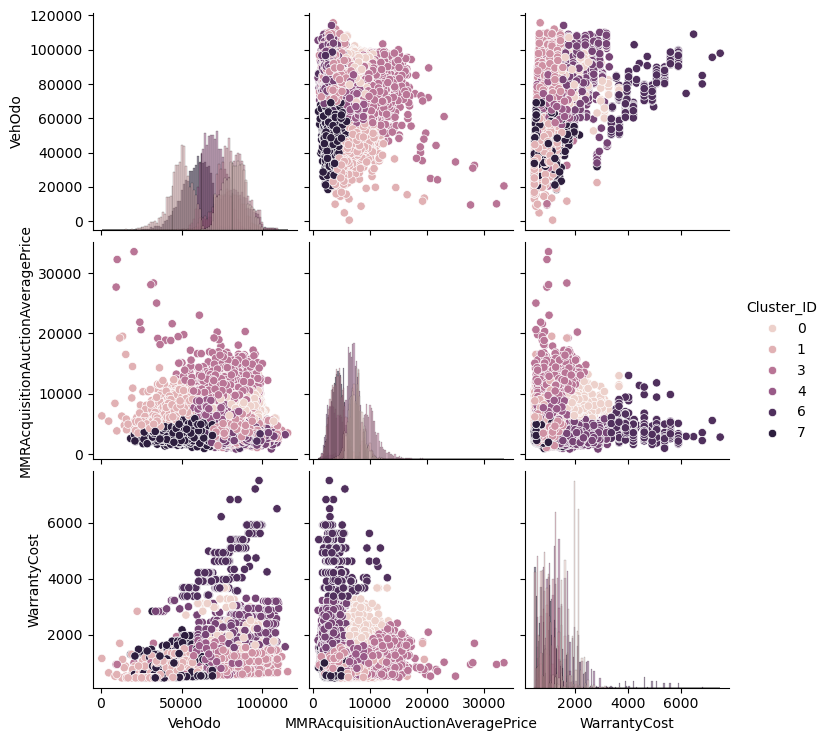

In [96]:
# set a different n_clusters
model = KMeans(n_clusters=8, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
# add column for cluster ID to data
y = model.predict(X)
df2['Cluster_ID'] = y
# how many in each?
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

### Find the optimal K value

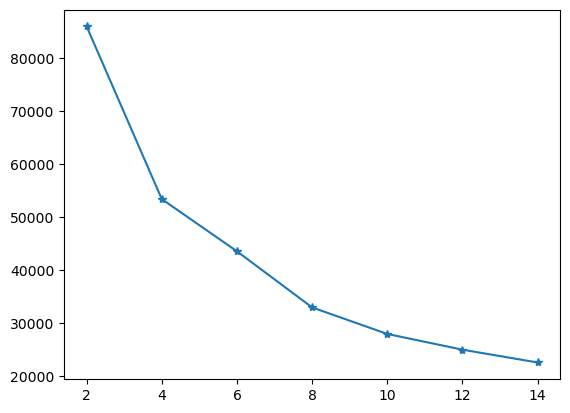

In [97]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

### Using Silhouette Score to determine the optimal cluster

In [98]:
from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.2868651706484757
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.24825348220561277
KMeans(random_state=42)
Silhouette score for k=8 0.2665155706803522


Sum of intra-cluster distance: 53413.01157164495
Centroid locations:
[ 0.76317756 -0.33191314  1.58984578]
[-1.2564292  0.0049117 -0.6753871]
[0.37000358 1.15144819 0.06491248]
[ 0.42541649 -0.7442531  -0.26177126]
Cluster membership
Cluster_ID
3    12883
1    11356
2    10178
0     6489
Name: count, dtype: int64


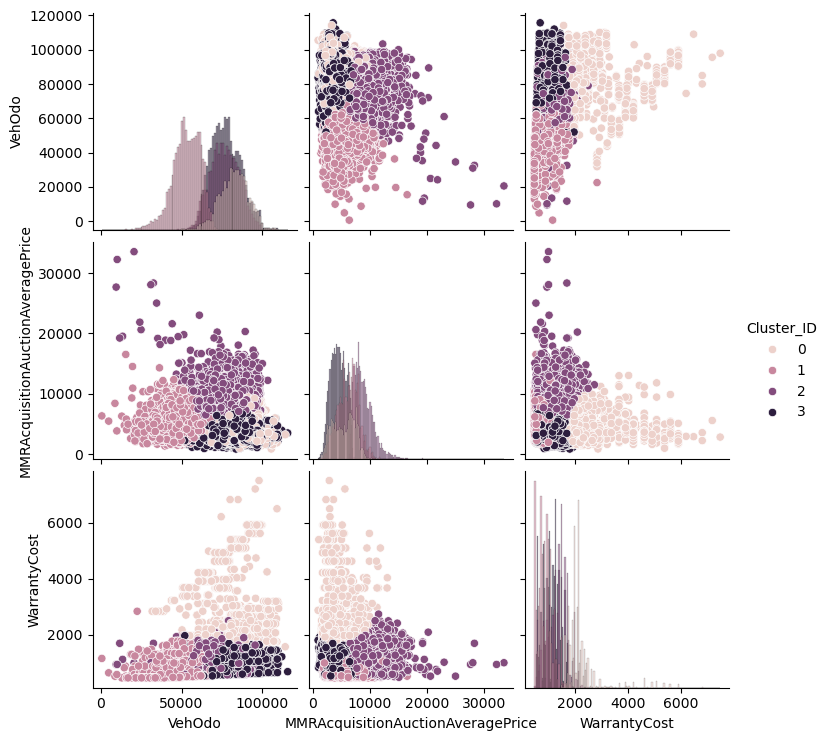

In [99]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=random_state)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
y = model.predict(X)
df2['Cluster_ID'] = y
# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

### Run distribution plot with optimal cluster

In [100]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size. Increase bin size to be more specific,
    #but 20 is more than enough
    n_bins = 20
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins,
            ax=ax[j], kde=True, stat="density")
            # plot the normal distribution with a black line
            sns.kdeplot(data=df[col], ax=ax[j], color="k")
        plt.tight_layout()
        plt.show()

Distribution for cluster 0


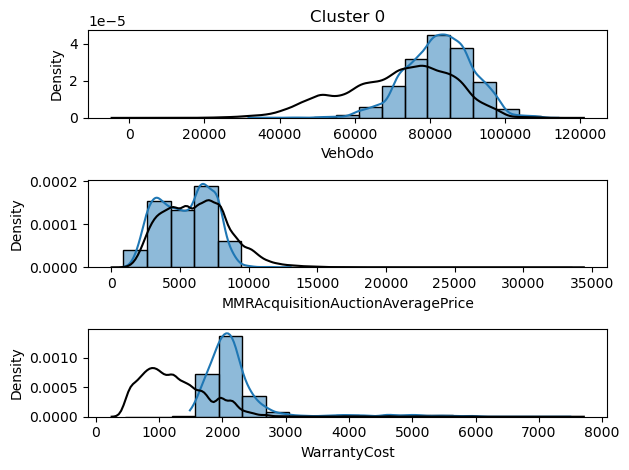

Distribution for cluster 1


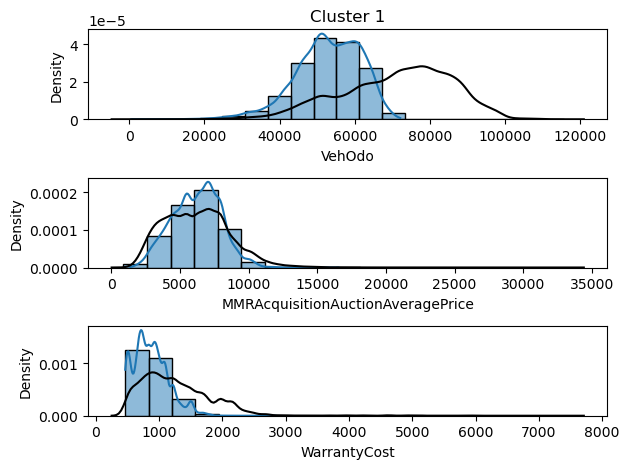

Distribution for cluster 2


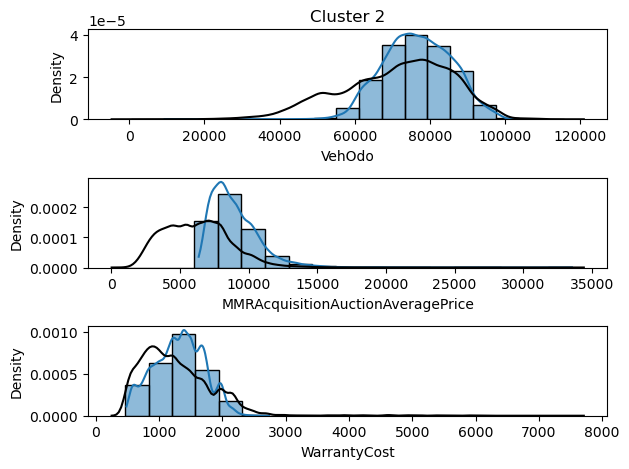

Distribution for cluster 3


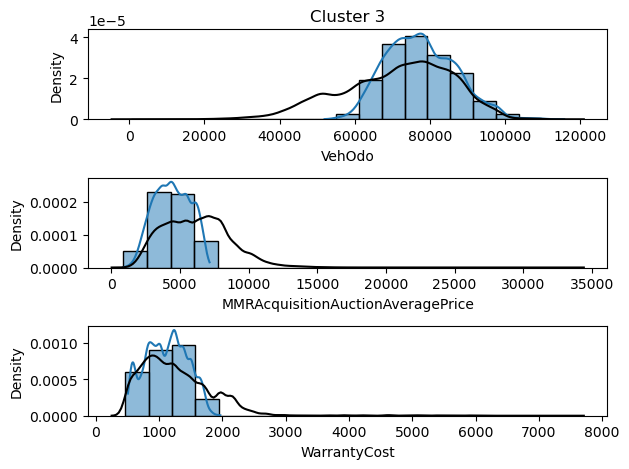

In [101]:
# inspecting cluster 0 and 3
inspect_clusters(df2, ['VehOdo','MMRAcquisitionAuctionAveragePrice', 'WarrantyCost'], [0, 1, 2, 3])

# Running the Agglomerative Clustering Algorithm

In [102]:
# from sklearn.cluster import AgglomerativeClustering
# agg_model = AgglomerativeClustering(n_clusters=3)
# agg_model.fit(X[:50]) # subset of X, only 50 data points

In [103]:
# from matplotlib import pyplot as plt
# from scipy.cluster.hierarchy import dendrogram
# def plot_dendrogram(model, **kwargs):
#     # Children of hierarchical clustering
#     children = model.children_
#     # Distances between each pair of children
#     # Since we don't have this information, we can use a uniform one for plotting
#     distance = np.arange(children.shape[0])
#     # The number of observations contained in each cluster level
#     no_of_observations = np.arange(2, children.shape[0]+2)
#     # Create linkage matrix and then plot the dendrogram
#     linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
# # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)
# plot_dendrogram(agg_model, labels=agg_model.labels_)
# plt.show()

# data for model 2

In [104]:
df.info()
print(df['Make'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 40906 entries, 0 to 41408
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   VehOdo                                      40906 non-null  int64 
 1   MMRAcquisitionAuctionAveragePrice           40906 non-null  int64 
 2   Make                                        40906 non-null  object
 3   WarrantyCost                                40906 non-null  int64 
 4   HasError_MMRAcquisitionAuctionAveragePrice  40906 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 1.6+ MB
['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']


# Running the Kprototypes Clustering

In [105]:
from sklearn.preprocessing import LabelEncoder
# convert string labels to numerical
le = LabelEncoder()
df3 = df[['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'Make','WarrantyCost']].copy()
df3['Make'] = le.fit_transform(df3['Make'].values)
# convert df to matrix
X = df3.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Start to do Kprototypes Clustering

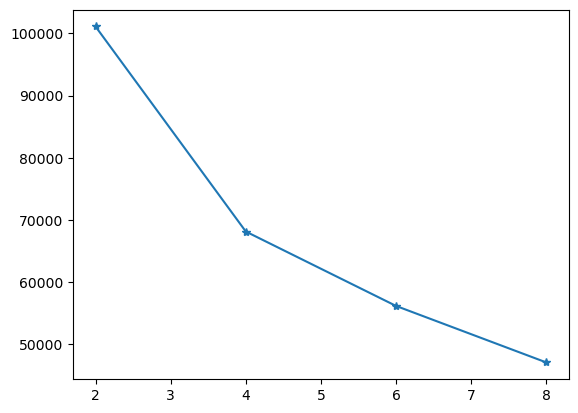

In [106]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
# list to save the clusters and cost
clusters = []
cost_vals = []
# this process is computationally expensive and may take some time
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=random_state, n_jobs=-1)
    model.fit_predict(X, categorical=[2]) #the Make column in 2
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

## Cluster 4

In [107]:
X_num = [[row[0], row[1],row[3]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[2]] for row in X] # variables of X with categorical datatype
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num,model.fit_predict(X,categorical=[2]),metric='euclidean')
print("Silscore for numeric variables:", silScoreNums)
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[2]),metric='hamming')
print("Silscore for categorical variables:", silScoreCats)
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4:", silScore)

Silscore for numeric variables: 0.2841085271355386
Silscore for categorical variables: -0.04414317274293529
The avg silhouette score for k=4: 0.11998267719630165


## Cluster 6

In [108]:
X_num = [[row[0], row[1],row[3]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[2]] for row in X] # variables of X with categorical datatype
model = clusters[2] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num,model.fit_predict(X,categorical=[2]),metric='euclidean')
print("Silscore for numeric variables:", silScoreNums)
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[2]),metric='hamming')
print("Silscore for categorical variables:", silScoreCats)
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6:", silScore)

Silscore for numeric variables: 0.25486779165709783
Silscore for categorical variables: -0.11640499368357592
The avg silhouette score for k=6: 0.06923139898676095


## Cluster 8

In [109]:
X_num = [[row[0], row[1],row[3]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[2]] for row in X] # variables of X with categorical datatype
model = clusters[3] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num,model.fit_predict(X,categorical=[2]),metric='euclidean')
print("Silscore for numeric variables:", silScoreNums)
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[2]),metric='hamming')
print("Silscore for categorical variables:", silScoreCats)
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8:", silScore)

Silscore for numeric variables: 0.2567662565420702
Silscore for categorical variables: -0.12953455692990887
The avg silhouette score for k=8: 0.06361584980608066


# Visualization 

Sum of intra-cluster distance: 68148.83212924749
Centroid locations:
[ 0.37956045  1.12496576  0.07903234 -0.75980367]
[ 0.42328314 -0.75113995 -0.25612386 -0.34242488]
[-1.25278131  0.01279521 -0.67575396 -0.48155114]
[ 0.76983119 -0.36106627  1.61292499 -0.75980367]
Cluster membership
Cluster_ID
1    12820
2    11357
0    10447
3     6282
Name: count, dtype: int64


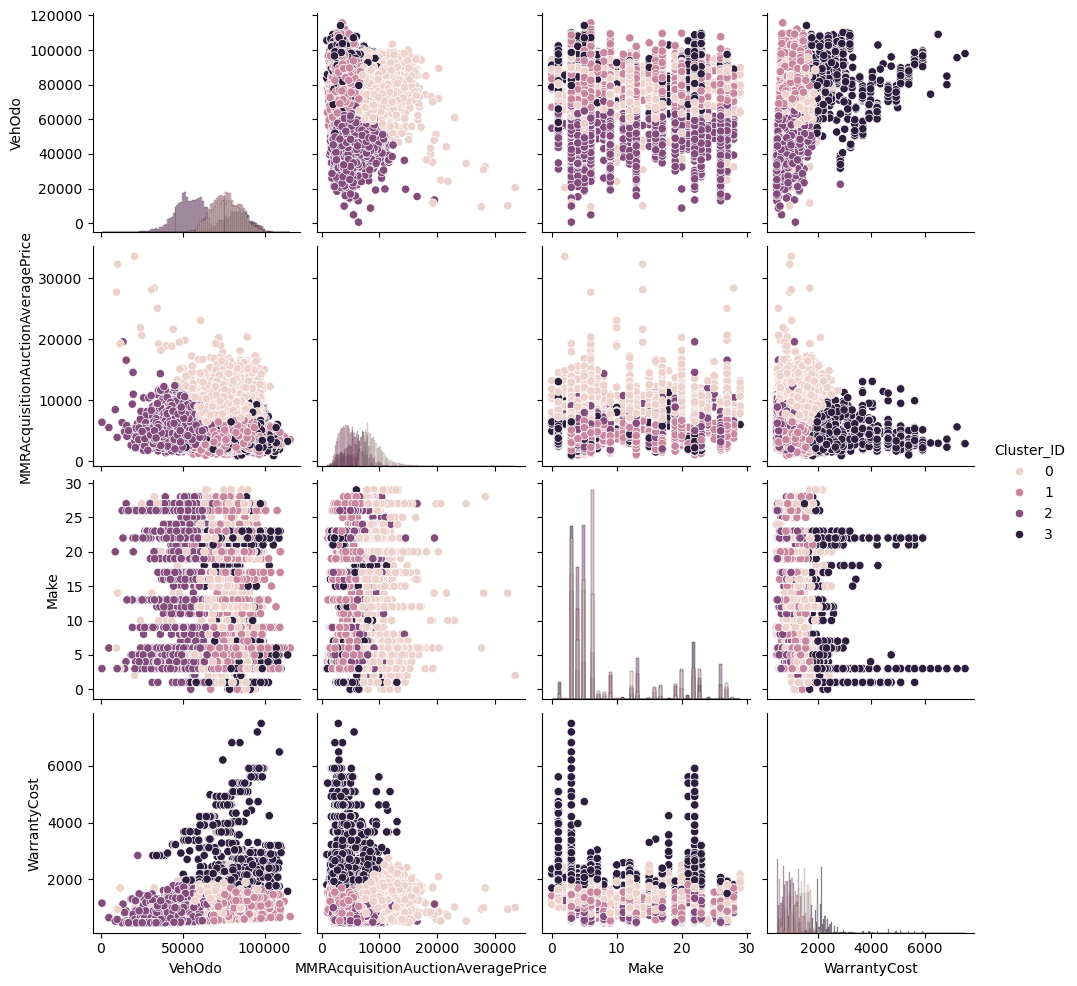

In [110]:
# visualisation of K=4 clustering solution
model = KPrototypes(n_clusters=4, random_state=random_state)
model.fit(X, categorical=[2])
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.cost_)
print("Centroid locations:")
for centroid in model.cluster_centroids_:
    print(centroid)
y = model.predict(X, categorical=[2])
df3['Cluster_ID'] = y
# how many in each
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df3, hue='Cluster_ID', diag_kind='hist')
plt.show()

# Distribution plot

In [111]:
def inspect_clusters(df, cols, clusters_to_inspect):
    # prepare the column and bin size. Increase bin size to be more specific,
    #but 20 is more than enough
    n_bins = 20
    for cluster in clusters_to_inspect:
        print("Distribution for cluster {}".format(cluster))
        # create subplots
        fig, ax = plt.subplots(nrows=4)
        ax[0].set_title("Cluster {}".format(cluster))
        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            # plot distribution of the cluster using histogram
            sns.histplot(df[df['Cluster_ID'] == cluster][col], bins=bins,
            ax=ax[j], kde=True, stat="density")
            # plot the normal distribution with a black line
            sns.kdeplot(data=df3[col], ax=ax[j], color="k")
        plt.tight_layout()
        plt.show()

Distribution for cluster 0


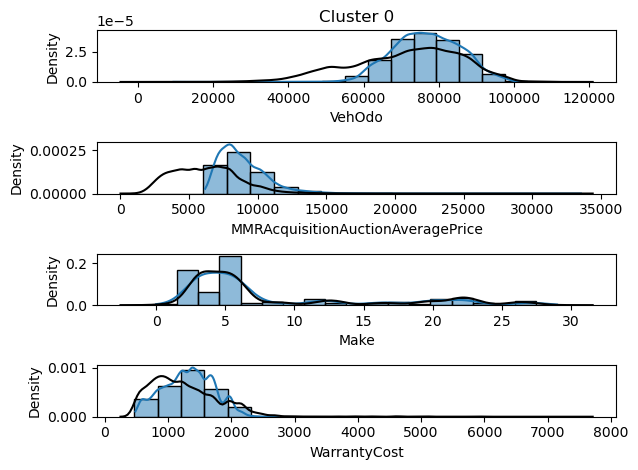

Distribution for cluster 1


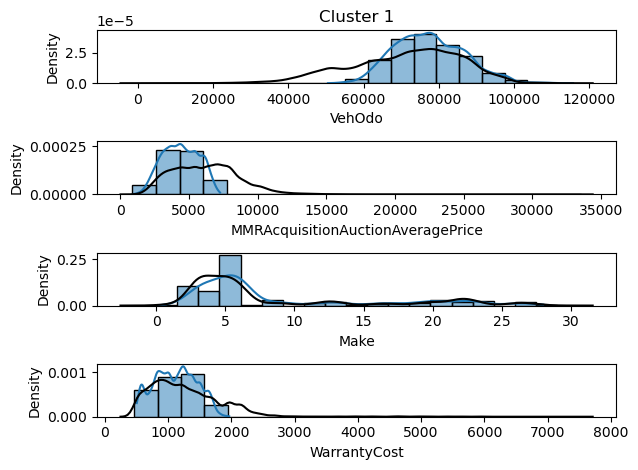

Distribution for cluster 2


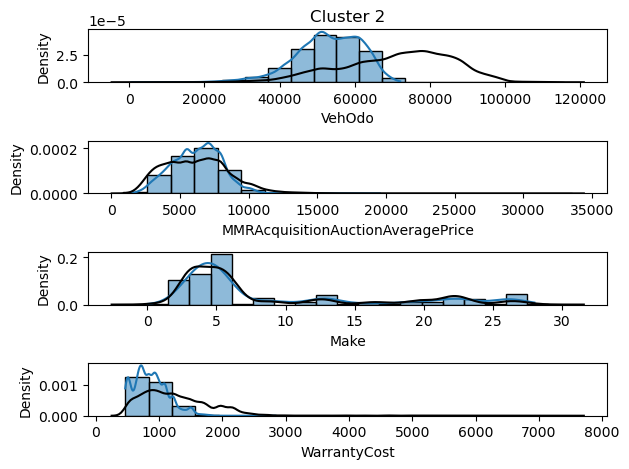

Distribution for cluster 3


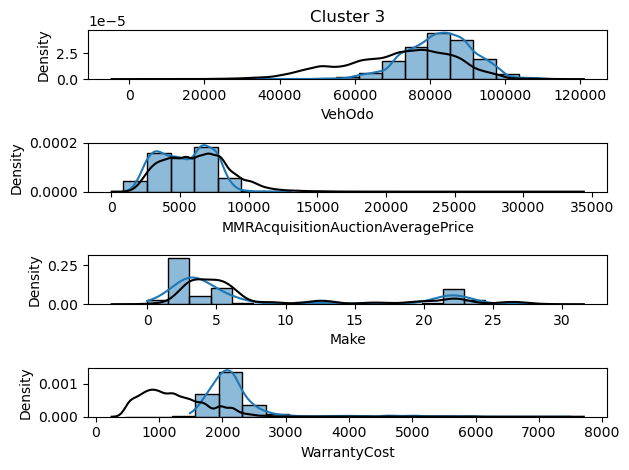

In [112]:
# inspecting cluster 0 and 3
inspect_clusters(df3, ['VehOdo','MMRAcquisitionAuctionAveragePrice', 'Make','WarrantyCost'], [0, 1, 2, 3])

Distribution for cluster 0


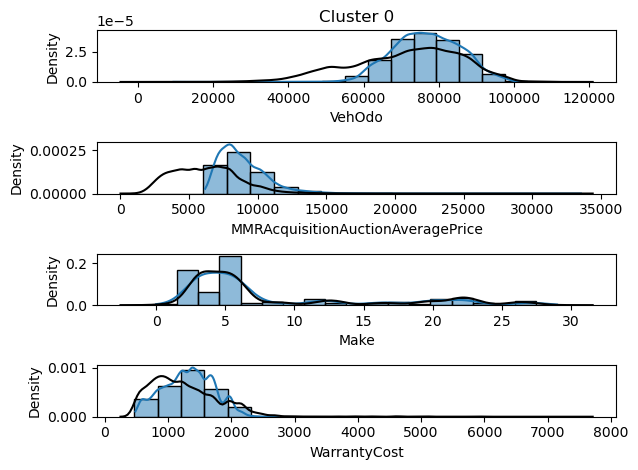

Distribution for cluster 1


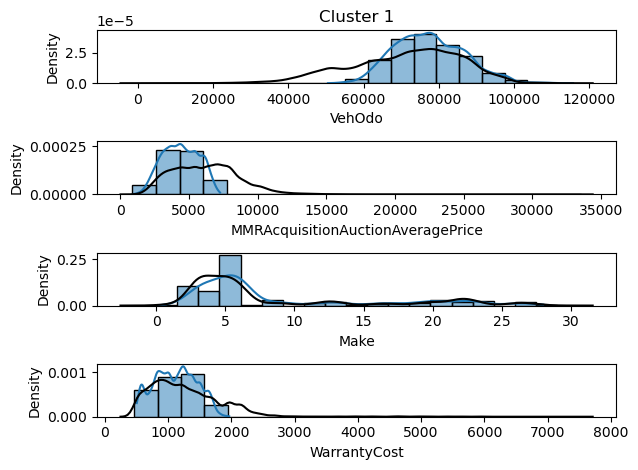

Distribution for cluster 2


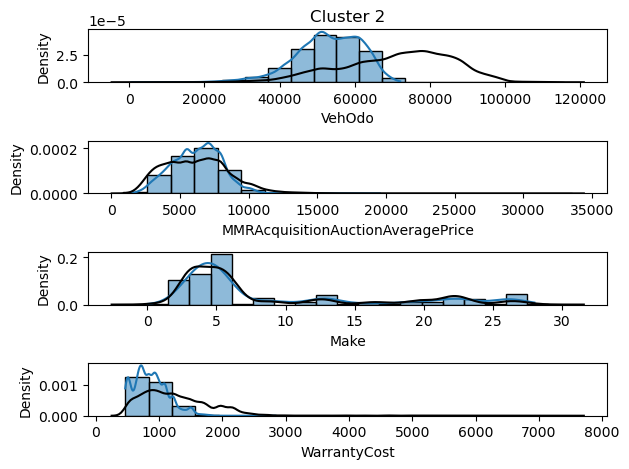

Distribution for cluster 3


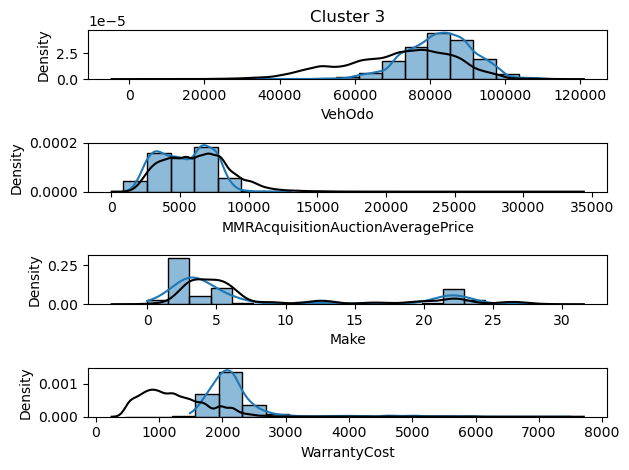

In [112]:
# inspecting cluster 0 and 3
inspect_clusters(df3, ['VehOdo','MMRAcquisitionAuctionAveragePrice', 'Make','WarrantyCost'], [0, 1, 2, 3])

# decode brand number

In [114]:
df3.groupby('Cluster_ID', sort=False)['Make'].value_counts().unstack(fill_value=0)


Make,5,4,3,22,19,16,26,13,23,27,...,21,0,2,11,15,25,24,14,18,29
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
2,2892,2199,1796,492,220,119,585,681,355,175,...,12,1,2,35,6,5,32,1,0,0
0,1977,983,2682,511,76,173,14,125,142,277,...,0,7,12,19,20,6,22,10,4,11
3,617,493,2875,957,6,33,4,65,234,6,...,78,3,3,4,12,0,0,0,15,1
1,1821,1506,2091,365,253,204,228,417,505,197,...,53,8,0,22,16,5,23,2,0,0
